In [348]:
import numpy as np
import random as rd
import math
import seaborn as sns
import matplotlib as plt
from IPython.display import display

DIRECTIONS = (
    (0, 1),  # Right
    (0, -1), # Left
    (1, 0),  # Up
    (-1, 0), # Down
)

SHIPTYPE =	{
    1 : 'Special Operations Craft',
    2 : 'Submarine',
    3 : 'Light Missile Cruiser',
    4 : 'Battleship',
    5 : 'Carrier',
    6 : 'Carrier and Plane 1',
    7 : 'Carrier and Plane 2'
}

SHIPLENGTH =	{
    1 : 2,
    2 : 3,
    3 : 3,
    4 : 4,
    5 : 5
}

# Game states: Whos turn, Game won/By Whom, Each Players sub shots, LMC shots, battlship shots, plane positions, plane missiles, plane alive

# 2 is a hit 1 is a miss

In [349]:
def generate_game(board_size):
    player_one_ship_board = generate_ship_board(board_size)
    player_two_ship_board = generate_ship_board(board_size)
    player_one_intel_board = np.zeros((board_size, board_size), dtype = int)
    player_two_intel_board = np.zeros((board_size, board_size), dtype = int)

    return [player_one_ship_board,player_one_intel_board,player_two_ship_board,player_two_intel_board]
    
def generate_ship_board(board_size):

    ship_board = np.zeros((board_size, board_size), dtype = tuple)
    for x in range(0,board_size):
        for y in range(0,board_size):
            ship_board[x][y] = (0,0)

    for i in range (1,6):

        ship_type = i
        ship_board = insert_ship(ship_board, ship_type, board_size)

    return ship_board

def insert_ship(board, ship_type, board_size):

    ship_size = SHIPLENGTH[ship_type]
    cells = False

    while not cells:
        row = rd.randint(0, board_size - 1)
        col = rd.randint(0, board_size - 1)
        direction = rd.choice(DIRECTIONS)
        dr, dc = direction
        cells = insert_ship_helper(row, col, board, direction, ship_size)


    for row, column in cells:
        board[row][column] = (ship_type,0)
    
    if ship_size == 5:
        plane_cells = rd.sample(cells,2)

        row, col = plane_cells[0]
        board[row][col] = (6,0)

        row, col = plane_cells[1]
        board[row][col] = (7,0)
    return board

def insert_ship_helper(row, col, board, direction, ship_size):
    

    cells = []
    dr, dc = direction

    for len in range(ship_size):
            try:
                if board[row][col] == (0,0):
                    cells.append((row, col))
                    row += dr
                    col += dc

                    if (row < 0) or (col < 0):
                        return None

                else:
                    return False
            except IndexError:
                return False

            if len == (ship_size-1):
                return cells

def simple_shot(row, col, board):
    if is_hit(board, (row,col)):
        return 2
    else:
        return 1

def update_game(player_one_intel_board, player_one_ship_board, player_two_intel_board, player_two_ship_board, players_turn, coordinates, player1spaces, player2spaces):
    row, col = coordinates

    if players_turn == 1:
        shot = simple_shot(row, col, player_two_ship_board)
        player_one_intel_board[row][col] = shot
        player_two_ship_board[row][col] = (player_two_ship_board[row][col][0],shot)
        if shot == 2:
            player2spaces += -1
    
    if players_turn == 2:
        shot = simple_shot(row, col, player_one_ship_board)
        player_two_intel_board[row][col] = shot
        player_one_ship_board[row][col] = (player_one_ship_board[row][col][0],shot)
        if shot == 2:
            player1spaces += -1
    
    return [player_one_intel_board, player_one_ship_board, player_two_intel_board, player_two_ship_board, player1spaces, player2spaces]
    
def is_hit(board, coordinates):
    row, col = coordinates
    if board[row][col][0] == 0:
        return False
    else:
        return True

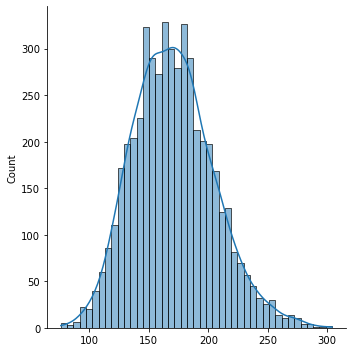

In [354]:
winner = []
turns  = []

for game in range (0,5000):

    [player_one_ship_board,player_one_intel_board,player_two_ship_board,player_two_intel_board] = generate_game(14)
    player1spaces = 17
    player2spaces = 17

    i = 0
    while (player1spaces != 0) and (player2spaces != 0):
        players_turn = (i%2) + 1
        i += 1

        row = rd.randint(0, 14 - 1)
        col = rd.randint(0, 14 - 1)
        coordinates = (row,col)
        
        [player_one_intel_board, player_one_ship_board, player_two_intel_board, player_two_ship_board, player1spaces, player2spaces] = update_game(player_one_intel_board, player_one_ship_board, player_two_intel_board, player_two_ship_board, players_turn, coordinates, player1spaces, player2spaces)

    if player1spaces == 0:
        winner.append(1)
    else:
        winner.append(2)
    
    turns.append(math.ceil(i/2))

sns.displot(turns, kde = True)

<AxesSubplot: ylabel='Count'>

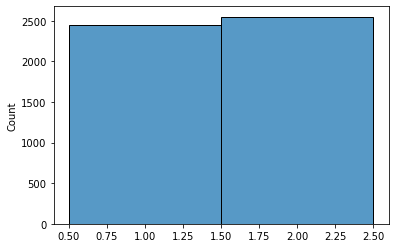

In [353]:
sns.histplot(winner, discrete=True)